# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center>Table of contents</center></h1> 
1. [Introduction](#1)   
2. [Importing libraries](#2)
3. [Explore the csv file](#3)  
4. [Classical FFT](#4)
5. [Short-Time Fourier Transform](#5)
6. [Spectogram](#6)     
    A. [Log-Amplitude Spectogram ](#7)     
    B. [Log-Frequency Spectogram ](#8)     
    C. [Mel Filter Bank & Mel Spectogram](#9) 
7. [Feature Extraction](#10)     
    A. [Zero Crossing Rate](#11)     
    B. [Chroma Features](#12)     
    C. [Mel-Frequency Cepstral Coefficients](#13) 
9. [A Small Appeal To All Of You](#14)    
8.[Thank You](#15)

<a id="1"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center>Introduction</center></h1> 

<span style="color:#bc5a45;">
    
-  In this dataset we have **114 different species of birds with 2162 diifferent sounds in mp3 format.** 
-  Let's try to process some of **their sounds & extract some of the features .**

<img src ="https://t4.ftcdn.net/jpg/04/76/29/69/240_F_476296910_XlFil5MNhQ4nDQbEZweZzt0qiKUdtI2c.jpg" width=400 height=550/>
    
<!-- <img src = "https://isaacscienceblog.files.wordpress.com/2017/08/3311485_orig.gif" width = 400 height = 450/> -->
    
</span>


<a id="2"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Our Libraries</center></h1> 


In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from glob import glob



# Libraries for processing sounds
import librosa
import librosa.display
import IPython.display as ipd
import soundfile as sf

import sklearn

import warnings
warnings.filterwarnings('ignore')

<a id="3"></a> 

# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Explore the csv file</center></h1> 


In [2]:
train_csv= pd.read_csv("../Birds Voice.csv")


# Create some time features
train_csv['year'] = train_csv['Date'].apply(lambda x: x.split('-')[0])
train_csv['month'] = train_csv['Date'].apply(lambda x: x.split('-')[1])
train_csv['day_of_month'] = train_csv['Date'].apply(lambda x: x.split('-')[2])

print("There are {:,} unique bird species in the dataset.".format(len(train_csv['common_name'].unique())))
train_csv.head()

There are 114 unique bird species in the dataset.


,common_name,scientific_name,recordist_name,recording_length,Date,TYPE,xc_id,Time,Country,Download_link,year,month,day_of_month
0,Common Ostrich,Struthio camelus australis,Frank Lambert,0:53,2019-10-30,call,XC516153,08:05,South Africa,https://xeno-canto.org/516153/download,2019,10,30
1,Common Ostrich,Struthio camelus,Jeremy Hegge,0:26,2014-11-20,call,XC208209,04:00,South Africa,https://xeno-canto.org/208209/download,2014,11,20
2,Common Ostrich,Struthio camelus,Jeremy Hegge,0:04,2014-11-21,call,XC208128,06:00,South Africa,https://xeno-canto.org/208128/download,2014,11,21
3,Common Ostrich,Struthio camelus,Derek Solomon,0:11,2010-02-09,call,XC46725,07:00,South Africa,https://xeno-canto.org/46725/download,2010,02,09
4,Common Ostrich,Struthio camelus,Morioka Zoological Park ZOOMO,1:47,2021-09-06,"voice during egg laying, zoo collection",XC675445,17:00,Japan,https://xeno-canto.org/675445/download,2021,09,06


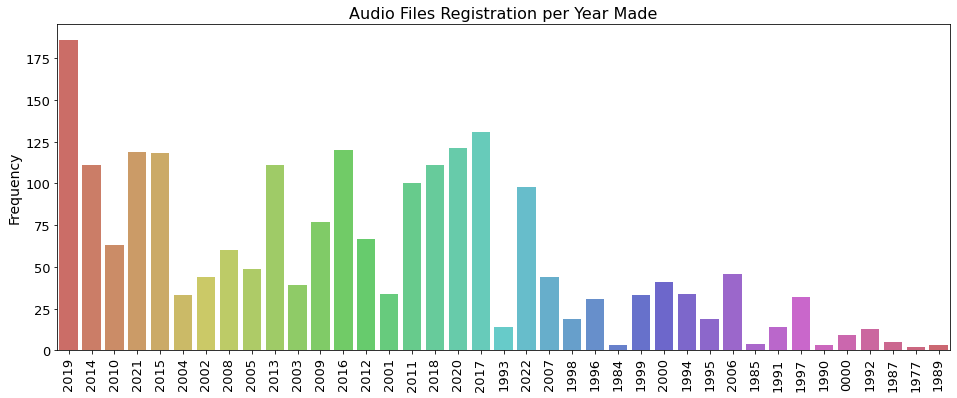

In [3]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_csv['year'], palette="hls")

plt.title("Audio Files Registration per Year Made", fontsize=16)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

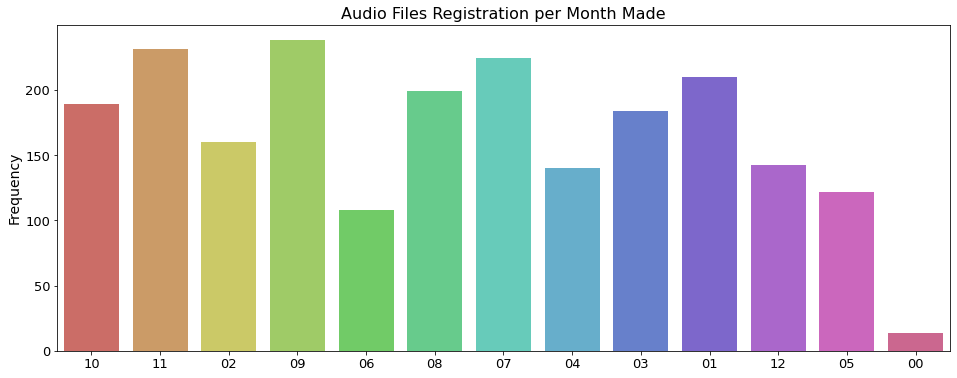

In [4]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(train_csv['month'], palette="hls")

plt.title("Audio Files Registration per Month Made", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Frequency", fontsize=14)
plt.xlabel("");

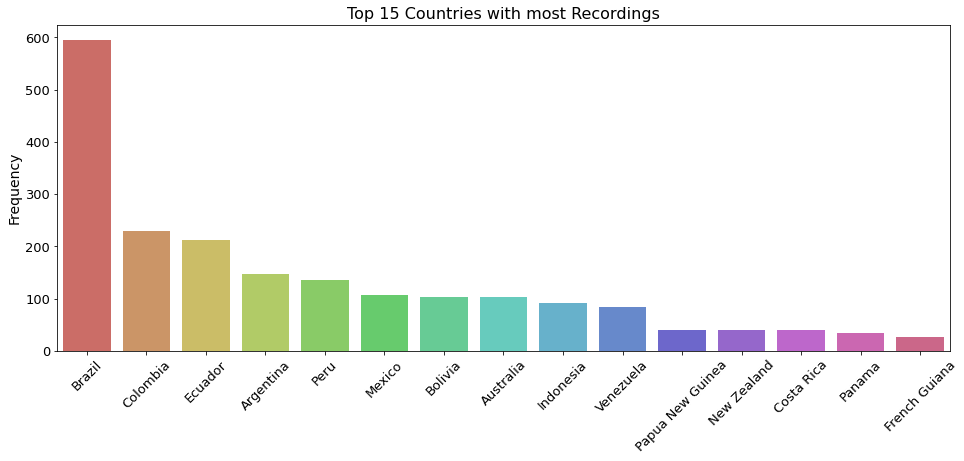

In [5]:
top_15 = list(train_csv['Country'].value_counts().head(15).reset_index()['index'])
data = train_csv[train_csv['Country'].isin(top_15)]


plt.figure(figsize=(16, 6))
ax = sns.countplot(data['Country'], palette='hls', order = data['Country'].value_counts().index)

plt.title("Top 15 Countries with most Recordings", fontsize=16)
plt.ylabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.xlabel("");

In [6]:
# Checking null values
train_csv.isnull().sum()

common_name          0
scientific_name      0
recordist_name       0
recording_length     0
Date                 0
TYPE                31
xc_id                0
Time                 0
Country              0
Download_link        0
year                 0
month                0
day_of_month         0
dtype: int64

In [7]:
train_csv['recordist_name'].nunique()

449

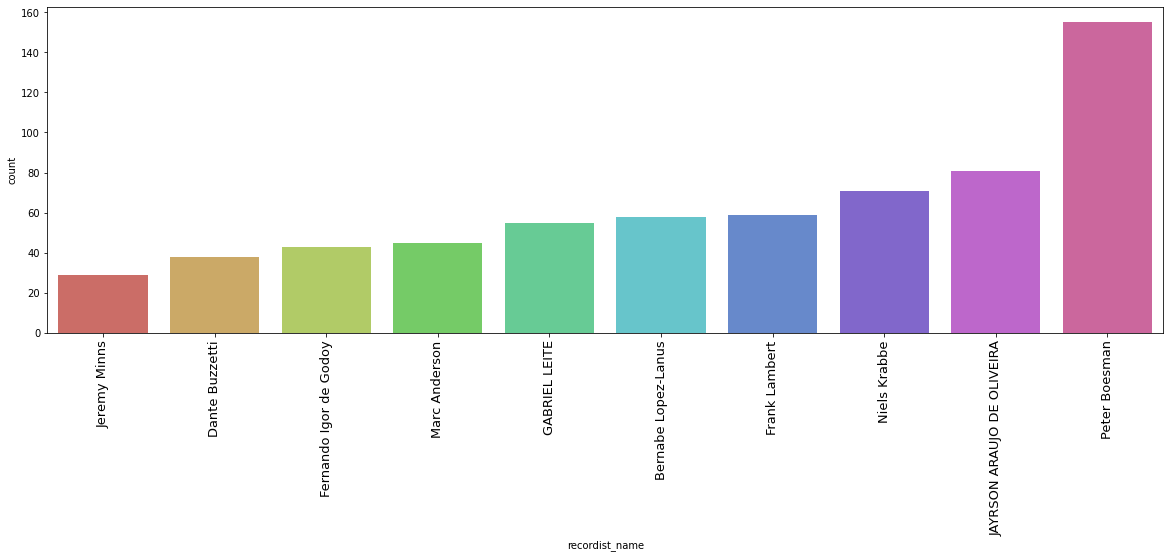

In [8]:

plt.figure(figsize=(20,6))
plt.xticks(rotation=90, fontsize=13)
ax = sns.countplot(train_csv['recordist_name'], palette='hls', order = train_csv['recordist_name'].value_counts()[:10].sort_values().index)

In [9]:
audio_file1=glob("../Voice of Birds/Australian Brushturkey_sound/*.mp3")

In [10]:
#Playing an audio file

ipd.Audio(audio_file1[9])

In [11]:
data, sr=sf.read(audio_file1[9])
data=data.T
Australian_Brushturkey_Raw_Audio = librosa.resample(data, sr, 22050)
print(Australian_Brushturkey_Raw_Audio);print(sr)

[-0.00403968 -0.00694786 -0.00330298 ...  0.000402   -0.0005747
  0.        ]
48000


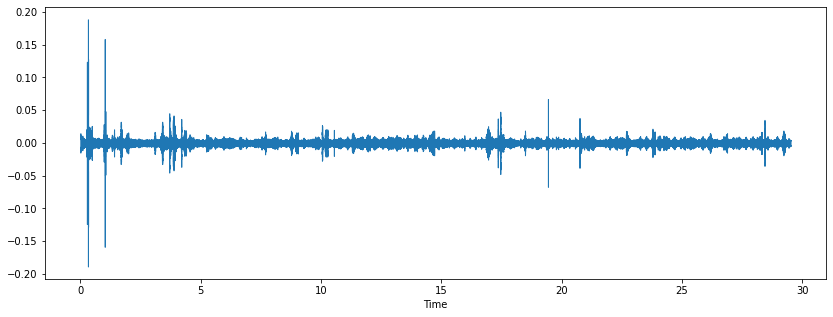

In [12]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(Australian_Brushturkey_Raw_Audio, sr=sr,x_axis="time")

In [13]:
print('Check Len of Audio:', np.shape(Australian_Brushturkey_Raw_Audio)[0]/sr)

Check Len of Audio: 29.518333333333334


In [14]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
trimmed_audiofile, sr_trimmed_audiofile = librosa.effects.trim(Australian_Brushturkey_Raw_Audio,top_db=23
                                            )

# the result is an numpy ndarray
print('Audio File:', trimmed_audiofile, '\n')
print('Audio File shape:', np.shape(trimmed_audiofile))

Audio File: [-0.00403968 -0.00694786 -0.00330298 ...  0.000402   -0.0005747
  0.        ] 

Audio File shape: (1416880,)


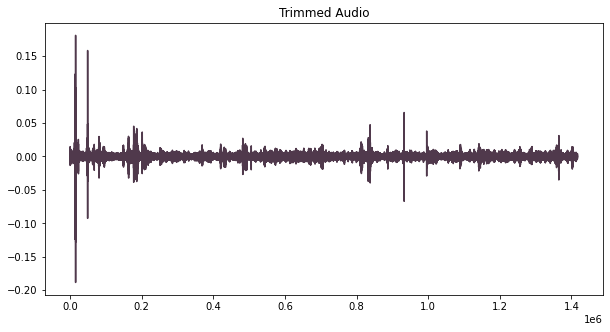

In [15]:
pd.Series(trimmed_audiofile).plot(figsize=(10,5),
                                  title="Trimmed Audio",
                                  color="#50394c")
plt.show()

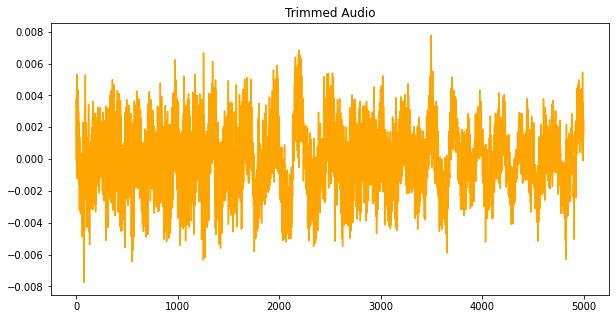

In [16]:
pd.Series(Australian_Brushturkey_Raw_Audio[25000:30000
               ]).plot(figsize=(10,5),
                                  title="Trimmed Audio",
                                  color="orange")
plt.show()

<a id="4"></a> 

# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Classical FFT </center></h1> 
 
<span style="color:#4040a1;">A fast Fourier transform (FFT) is an algorithm that computes the **discrete Fourier transform (DFT) of a sequence, or its inverse (IDFT)**. Fourier analysis **converts a signal from its original domain (often time or space) to a representation in the frequency domain and vice versa**. The DFT is obtained by decomposing a sequence of values into components of different frequencies.</span>
<img src = "https://isaacscienceblog.files.wordpress.com/2017/08/3311485_orig.gif" width = 400 height = 450/>
**<font color='#556B2F'> Formula to Calculate FFT: <font>**
 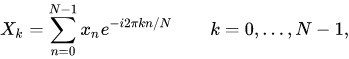

In [17]:
Australian_Brushturkey_Raw_Audio.shape

(1416880,)

In [18]:
raw_audio_fft=np.fft.fft(Australian_Brushturkey_Raw_Audio)

In [19]:
raw_audio_fft.shape

(1416880,)

In [20]:
raw_audio_fft[0]

(-8.962632184257828+0j)

**<span style="color:#bc5a45;">It is in complex form .We just need the magnitude . So we will calculate the absolute value .</span>**

In [21]:
magnitude=np.abs(raw_audio_fft)

In [22]:
# Now we successfully discarded the compl
magnitude[1]

0.6978286258668852

In [23]:
def plot_manitude_spectrum(signal,title,sr):
    ft=np.fft.fft(signal)
    magnitude_spectrum=np.abs(ft)
    
    #plot
    plt.figure(figsize=(16,5))
    frequency=np.linspace(0,sr,len(magnitude_spectrum))
    plt.plot(frequency,magnitude_spectrum)
    plt.xlabel("frequency{Hz}")
    plt.title(title)

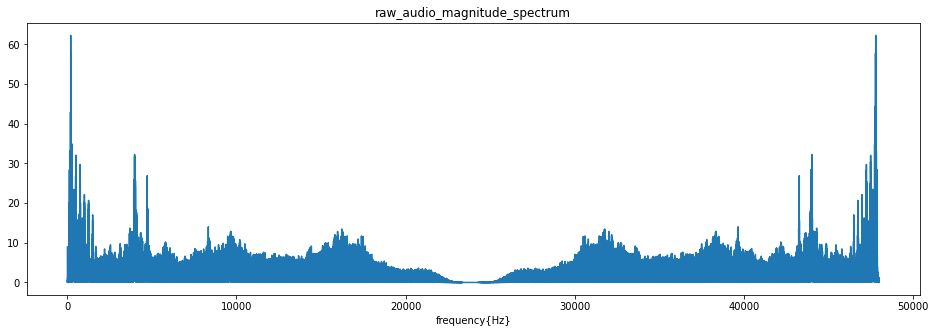

In [24]:
plot_manitude_spectrum(Australian_Brushturkey_Raw_Audio,"raw_audio_magnitude_spectrum",sr)

<a id="5"></a> 

# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center>  Short-Time Fourier Transform </center></h1>  
    
<span style="color:#4040a1;">It, is a Fourier-related transform used to **determine the sinusoidal frequency and phase content of local sections of a signal as it changes over time**. In practice, the procedure for computing STFTs is to **divide a longer time signal into shorter segments of equal length** and then **compute the Fourier transform separately on each shorter segment.** This reveals the Fourier spectrum on each shorter segment. </span>

### <font color='#556B2F'> Some Concepts To Know: <font>

#### <font color='#556B2F'> Windowing: <font>

<span style="color:#4040a1;">
    
-  Windowing is a means to **stationarize signals.**
    
-  Inside a small enough window, you can expect that the **properties of the signal chunk do not vary too fast.** And you now can use **tools well-suited to stationary signals, like Fourier-based techniques.** 
    
-  You can imagine **non-overlapping rectangular windows, each defining a frame.** Each sample is, somehow, treated with the **same weight( (the height of the window)**. However, when you look at the features extracted from two consecutive frames, or **when processing them, the change of property between the frames may induce a discontinuity**, or a jump ("the difference of parameter values of neighbouring frames can be higher"). 
</span>
<img src = "https://i.stack.imgur.com/Jg5EG.png" width = 400 height = 450/>


</span>

####  <font color='#556B2F'> Frame: <font>

<span style="color:#4040a1;">
    
-  While the frequency content of a signal may change over long periods of time, real signals tend to be approximately              stationary if we look only at short fragments.    
    
-  These **fragments are known as frames,** and typically span a few thousand samples at a time.
    
-  The number of samples in a frame is conveniently known as the **frame length .**
 </span>

#### <font color='#556B2F'> Hop Size:<font>

<span style="color:#4040a1;">
-  Hop size should refer to the number of samples in between successive frames . For signal analysis Hop Size should be less than the frame size, so that frames overlap.

In the above diagram 

-  Hop size would be **Q**
-  frame size would be **K**
- all in relation to a signal **s(n)**.
### <font color='#556B2F'>Formula:<font>
<img src ="http://www.dsprelated.com/josimages_new/sasp2/img1246.png" width=400 height=450/>
<img src ="http://www.dsprelated.com/josimages_new/sasp2/img1248.png" width=400 height=450/>

In [25]:
# Extracting STFt

FRAME_SIZE=2048
HOP_SIZE=512


In [26]:
S_SCALE=librosa.stft(Australian_Brushturkey_Raw_Audio,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)

In [27]:
S_SCALE.shape

(1025, 2768)

**<span style="color:#bc5a45;">Here 2768 are numbers of temporal bins</span>**

In [28]:
type(S_SCALE[0][0])

numpy.complex128

**<span style="color:#bc5a45;">So It is a  series of complex fourier coefficients .</span>**

<a id="6"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Spectogram </center></h1> 

In [29]:

Spec_scale=np.abs(S_SCALE)**2

In [30]:
print(Spec_scale.shape)
print(type(Spec_scale[0][0]))

(1025, 2768)
<class 'numpy.float64'>


In [31]:
# Visualizing Spectogram
def plot_spec(y,sr,hop_length,y_axis="linear"):
    
    plt.figure(figsize=(16,6))
    librosa.display.specshow(
                    y,
                    sr=sr,
                    hop_length=hop_length, 
                    x_axis="time",
                    y_axis=y_axis)
    
    plt.colorbar()

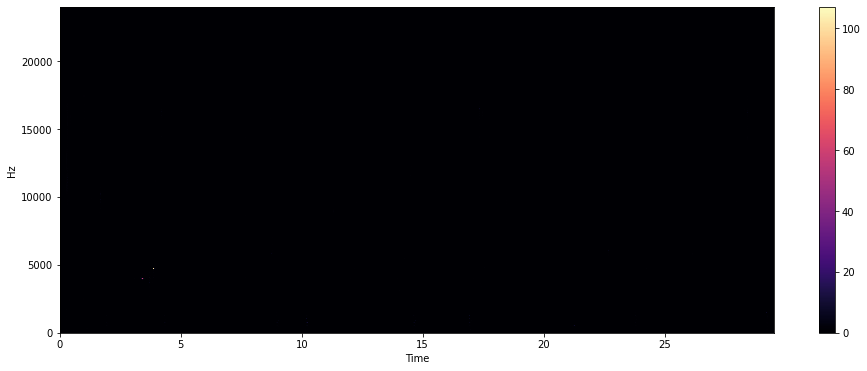

In [32]:
plot_spec(Spec_scale,sr,HOP_SIZE)

**<span style="color:#bc5a45;">We didn't draw many info from here ,as you could see the energies are less observed .So we will gofor another menthod called as Log Amplitude Spectogram </span>**

<a id="7"></a> 

## <font color='#556B2F'> Log-Amplitude Spectogram <span>

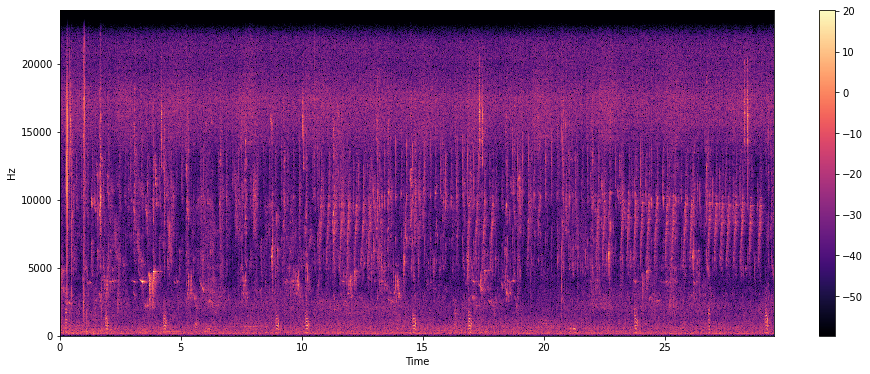

In [33]:
y_log_scale=librosa.power_to_db(Spec_scale)
plot_spec(y_log_scale,sr,HOP_SIZE)

**<span style="color:#bc5a45;">You could oberve that , it is far better than before one . </span>**

<a id="8"></a> 

## <font color='#556B2F'> Log-Frequency Spectrum <font>
**<span style="color:#bc5a45;">It is same as Log-Amplitude Spectrum , But in this case we will go for frequency instead of amplitude . </span>**

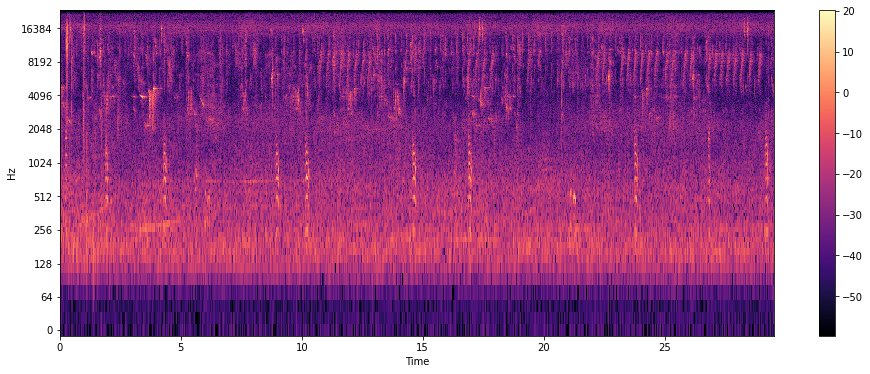

In [34]:
plot_spec(y_log_scale,sr,HOP_SIZE,y_axis='log')

<a id="9"></a> 

## <font color='#556B2F'>Mel Filter Banks:<span>

<span style="color:#bc5a45;">
    
-  The final step to computing filter banks is applying triangular filters, typically 40 filters, nfilt = 40 on a Mel-scale to the power spectrum to extract frequency bands. 
-  The Mel-scale aims to mimic the non-linear human ear perception of sound, by being more discriminative at lower frequencies and less discriminative at higher frequencies.
-  Each filter in the filter bank is triangular having a response of 1 at the center frequency and decrease linearly towards 0 till it reaches the center frequencies of the two adjacent filters where the response is 0, as shown in this figure:
<img src ="https://haythamfayek.com/assets/posts/post1/mel_filters.jpg" width=500 height=650/>
</span>

In [35]:
filter_bank=librosa.filters.mel(n_fft=2048,sr=22050,n_mels=10)

In [36]:
filter_bank.shape

(10, 1025)

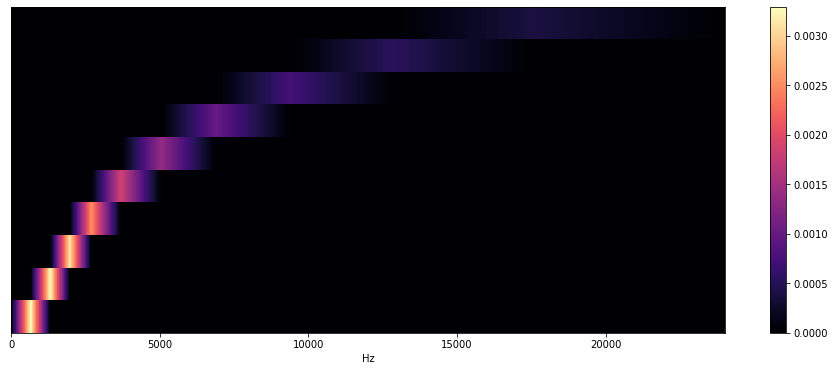

In [37]:
plt.figure(figsize=(16,6))
librosa.display.specshow(
                    filter_bank,
                    sr=sr,
                    x_axis="linear")
plt.colorbar()

## <font color='#556B2F'>Mel Spectogram<font>
<span style="color:#bc5a45;">
    
-  A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.
-  Use mel scale to form the mel spectrogram.    
</span>

In [38]:
mel_spec=librosa.feature.melspectrogram(Australian_Brushturkey_Raw_Audio,sr=sr,n_fft=2048,hop_length=512,n_mels=90)

In [39]:
mel_spec.shape

(90, 2768)

In [40]:
log_mel_spectogram=librosa.power_to_db(mel_spec)
log_mel_spectogram.shape

(90, 2768)

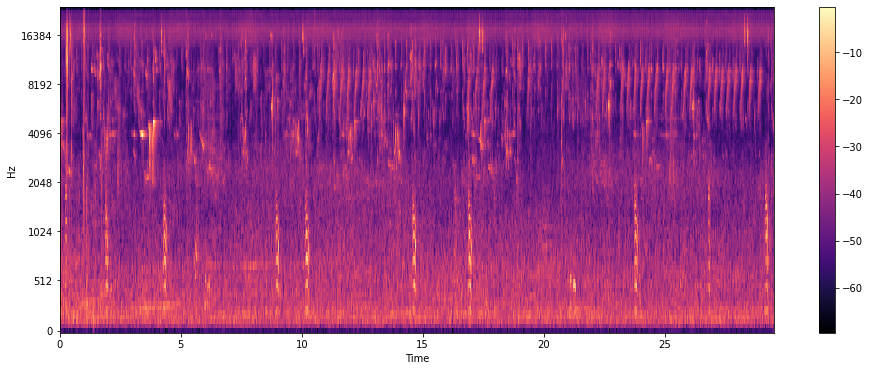

In [41]:
plt.figure(figsize=(16,6))
librosa.display.specshow(
                    log_mel_spectogram,
                    sr=sr, 
                    x_axis="time",
                    y_axis="mel")
plt.colorbar()

<a id="10"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Feature Extraction Methods</center></h1> 

<a id="11"></a> 

## <font color='#556B2F'>1. Zero Crossing Rate:<font>
<span style="color:#bc5a45;">
    
-  The zero-crossing rate (ZCR) is the rate at which a **signal changes from positive to zero to negative or from negative to zero to positive.**    
-   It is represented by an **intercept of the axis** (zero value) in the graph of the function. 
<img src ="https://editor.analyticsvidhya.com/uploads/805691280px-Zero_crossing.png" width=500 height=650/>  
    
</span>

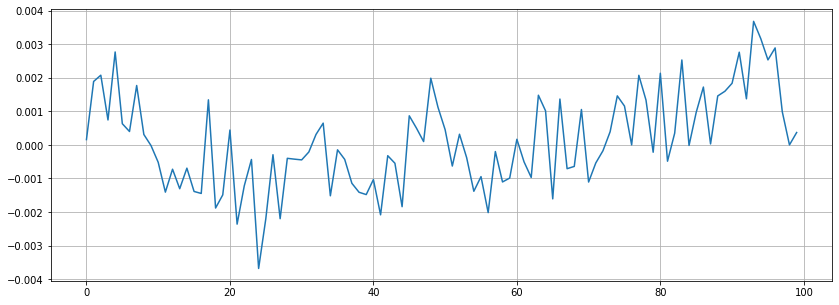

In [42]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(Australian_Brushturkey_Raw_Audio[n0:n1])
plt.grid()

In [43]:
zero_crossings = librosa.zero_crossings(Australian_Brushturkey_Raw_Audio[n0:n1], pad=False)
print(sum(zero_crossings))

28


<span style="color:#bc5a45;">
    
-  The spectral centroid is a measure used in digital signal processing to characterise a spectrum.
-   It indicates where the center of mass of the spectrum is located.
- It is sometimes called center of spectral mass .    
</span>


In [44]:
spectral_centroids = librosa.feature.spectral_centroid(Australian_Brushturkey_Raw_Audio, sr=sr)[0]
spectral_centroids.shape

(2768,)

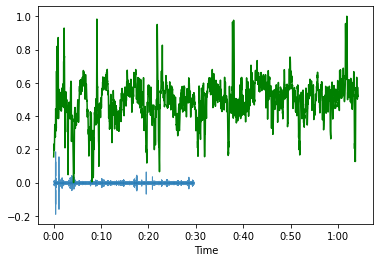

In [45]:
# Visualizing 

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(Australian_Brushturkey_Raw_Audio, sr=sr, alpha=0.8)
plt.plot(t, normalize(spectral_centroids), color='g')

<a id="12"></a> 
##  <font color='#556B2F'>2. Chroma Features:<font>
<span style="color:#bc5a45;">
    
-  The chroma feature is a descriptor, which represents the **tonal content of a musical audio signal in a condensed form.** 
    
-  Therefore chroma features can be considered as **important prerequisite** for high-level semantic analysis, like chord            recognition or harmonic similarity estimation.
    
-  A **better quality of the extracted chroma feature** enables **much better results** in these high-level tasks. Short Time Fourier Transforms and Constant Q Transforms are used for chroma feature extraction.
</span>


Chromogram Australian Brushturkey: (12, 709)


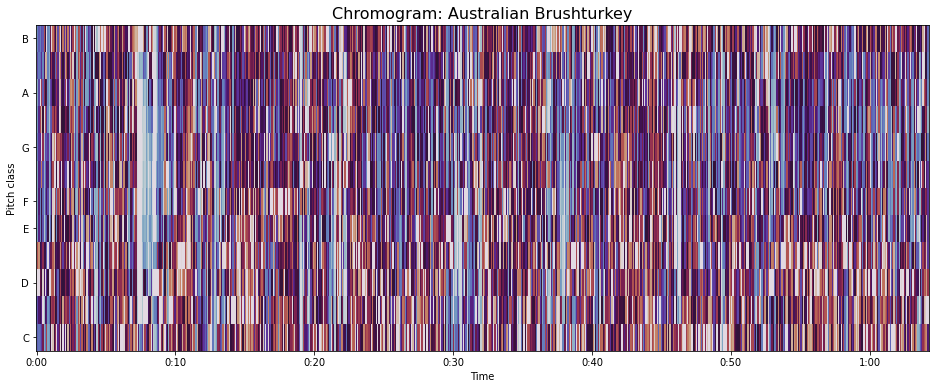

In [46]:
hop_length = 2000
chromagram = librosa.feature.chroma_stft(trimmed_audiofile, sr=sr, hop_length=hop_length)
print('Chromogram Australian Brushturkey:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='twilight')

plt.title("Chromogram: Australian Brushturkey", fontsize=16);

<a id="13"></a> 
### <font color='#556B2F'>3. Mel-Frequency Cepstral Coefficients(MFCCs) <font>
    
<span style="color:#bc5a45;">
    
-  The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
    
-  The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue, teeth etc.

- **This shape determines what sound comes out**. If we can **determine the shape accurately**, this should give us an accurate representation of the **phoneme** being produced.  
- The shape of the vocal tract manifests itself in the **envelope of the short time power spectrum**, and the **job of MFCCs is to accurately represent this envelope.**
<span>

In [47]:
mfccs = librosa.feature.mfcc(Australian_Brushturkey_Raw_Audio, sr=sr)
print(mfccs.shape)

(20, 2768)


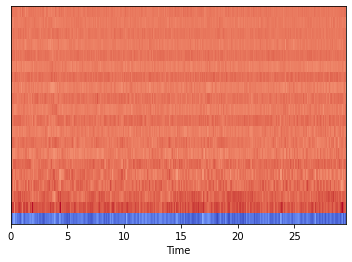

In [48]:
#Visualizing  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<span style="color:#bc5a45;">
Here mfcc computed 20 MFCC s over 2768 frames. We can also perform feature scaling such that each coefficient dimension has zero mean and unit variance:
    <span>

[-3.69646510e-16 -2.77234882e-16  0.00000000e+00 -2.82368862e-17
  4.10718344e-17 -1.02679586e-17  7.18757103e-17  8.21436689e-17
  4.62058137e-17  0.00000000e+00 -8.98446378e-17  2.05359172e-17
 -3.85048448e-17 -3.08038758e-17 -1.12947545e-16 -4.10718344e-17
  0.00000000e+00 -3.08038758e-17 -1.23215503e-16  1.54019379e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


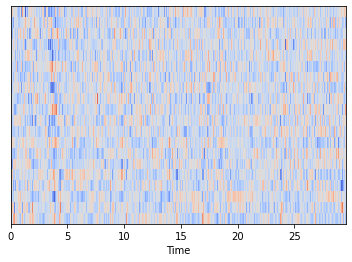

In [49]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

<a id="14"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> A Small Appeal To All Of You</center></h1> 

<span style="color:#bc5a45;">
    
-  State of the World’s Birds report warns **human actions and climate crisis putting 49% in decline**, with **one in eight bird species under threat of extinction .**
-  In **2022, 12.5% of bird species were at risk.**
-  A 2021 study estimates that there are about six birds for every human on the planet. That leaves us with a **total bird population of about 50 billion.**
-  Now It Is **Our Responsibility To Save Those Birds & Save Our Earth .** 
<img src ="https://previews.123rf.com/images/vgarts/vgarts1507/vgarts150700185/42259742-save-bird-save-environment.jpg" width=400 height=450/>
</span>

<a id="15"></a> 
# <h1 style='background:#e06377; border:2; border-radius: 10px;padding-top: 2%;; font-size:200%; font-weight: bold; color:#556B2F'><center> Thank You</center></h1> 
 
<!-- </span> -->
<img src="https://media.tenor.com/K9ZAaVVcwmUAAAAd/thanks-thank-you.gif" width= 400 height = 450 />